In [1]:
import numpy as np
import torch
import torch.nn as nn
from Code.Models.schnet import SchNet
from Code.Models.api import Network

In [2]:
debug = False

In [3]:
data_path_train = './Dataset/iso17_train_X.npy'
label_path_train = './Dataset/iso17_train_Y.npy'
data_path_within = './Dataset/iso17_within_X.npy'
label_path_within = './Dataset/iso17_within_Y.npy'
comment = 'alldata_n_step_no_norm'
eval_path = './evaluation/iso17'

In [4]:
X_train = np.load(data_path_train)
Y_train = np.load(label_path_train) * -1
X_within = np.load(data_path_within)
Y_within = np.load(label_path_within) * -1

In [5]:
if debug:
    n_data = 1000
    X_train = X_train[:n_data]
    Y_train = Y_train[:n_data]
    X_within = X_within[:n_data]
    Y_within = Y_within[:n_data]

In [6]:
schnet = SchNet(use_cuda=False, comment=comment, eval_path=eval_path, abc_scheme=(0.001, 0.96, 1.0))

In [7]:
network = Network(schnet)

In [8]:
network.create_dataloaders(X_train, Y_train, X_within, Y_within, 32, normalize_X=False)

(505000, 19, 19) (505000, 1)
(404000, 19, 19) (404000, 1)
(101000, 19, 19) (101000, 1)


In [10]:
network.fit(100)

epoch: 1	progress: 0.01	time estimate: 6051.44	train loss: 0.003337	test loss: 0.00147
epoch: 2	progress: 0.02	time estimate: 5966.03	train loss: 0.001092	test loss: 0.000795
epoch: 3	progress: 0.03	time estimate: 5889.74	train loss: 0.000831	test loss: 0.000723
epoch: 4	progress: 0.04	time estimate: 5825.96	train loss: 0.000718	test loss: 0.00061
epoch: 5	progress: 0.05	time estimate: 5771.18	train loss: 0.000656	test loss: 0.00055
epoch: 6	progress: 0.06	time estimate: 5713.64	train loss: 0.000618	test loss: 0.000527
epoch: 7	progress: 0.07	time estimate: 5653.07	train loss: 0.000583	test loss: 0.000481
epoch: 8	progress: 0.08	time estimate: 5593.82	train loss: 0.000561	test loss: 0.000527
epoch: 9	progress: 0.09	time estimate: 5534.5	train loss: 0.00054	test loss: 0.000485
epoch: 10	progress: 0.1	time estimate: 5474.37	train loss: 0.000524	test loss: 0.000614
epoch: 11	progress: 0.11	time estimate: 5415.23	train loss: 0.000505	test loss: 0.000456
epoch: 12	progress: 0.12	time estima

epoch: 94	progress: 0.94	time estimate: 365.64	train loss: 0.000293	test loss: 0.000288
epoch: 95	progress: 0.95	time estimate: 304.71	train loss: 0.000293	test loss: 0.000292
epoch: 96	progress: 0.96	time estimate: 243.78	train loss: 0.000288	test loss: 0.000358
epoch: 97	progress: 0.97	time estimate: 182.82	train loss: 0.000287	test loss: 0.000332
epoch: 98	progress: 0.98	time estimate: 121.88	train loss: 0.000287	test loss: 0.000322
epoch: 99	progress: 0.99	time estimate: 60.94	train loss: 0.000286	test loss: 0.000406
epoch: 100	progress: 1.0	time estimate: 0.0	train loss: 0.000286	test loss: 0.000292


In [11]:
network.calculate_mae(network.test_loader)

0.09108348888116868

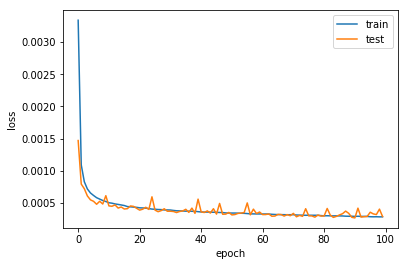

In [12]:
network.save_loss_plot()

In [ ]:
network.test_losses

In [ ]:
network.calculate_test_mae()

In [ ]:
network.transform(network.train_loader)

In [ ]:
opt = torch.optim.Adam(schnet.parameters())